# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
from tabulate import tabulate

In [28]:
filename="SUSY-small.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [29]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   signal        500000 non-null  float64
 1   l_1_pT        500000 non-null  float64
 2   l_1_eta       500000 non-null  float64
 3   l_1_phi       500000 non-null  float64
 4   l_2_pT        500000 non-null  float64
 5   l_2_eta       500000 non-null  float64
 6   l_2_phi       500000 non-null  float64
 7   MET           500000 non-null  float64
 8   MET_phi       500000 non-null  float64
 9   MET_rel       500000 non-null  float64
 10  axial_MET     500000 non-null  float64
 11  M_R           500000 non-null  float64
 12  M_TR_2        500000 non-null  float64
 13  R             500000 non-null  float64
 14  MT2           500000 non-null  float64
 15  S_R           500000 non-null  float64
 16  M_Delta_R     500000 non-null  float64
 17  dPhi_r_b      500000 non-null  float64
 18  cos_

In [69]:
N_Train= int(0.8 * len (df))

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [43]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

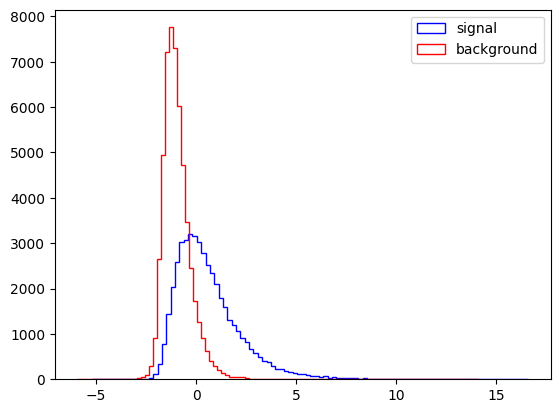

In [47]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [51]:
train_decision = Fisher.decision_function(X_Train)
test_decision = Fisher.decision_function(X_Test)

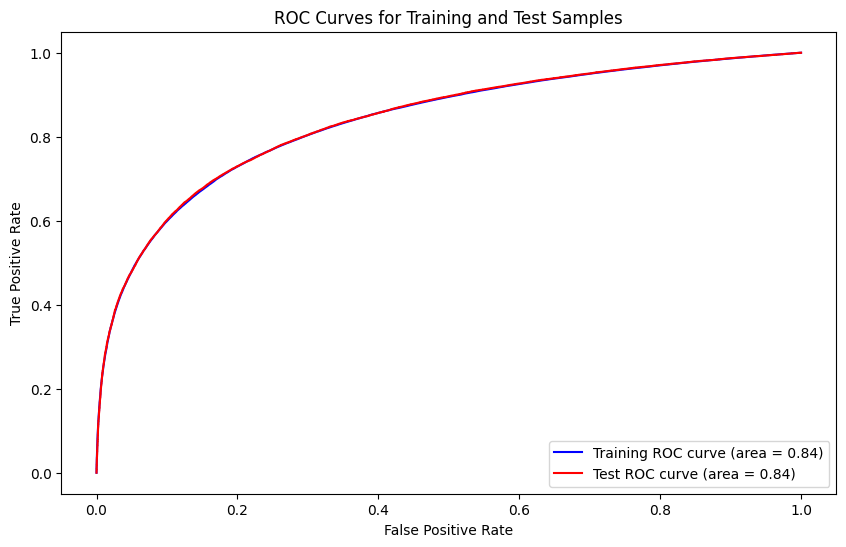

In [53]:
fpr_train, tpr_train, _ = roc_curve(y_Train, train_decision)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_Test, test_decision)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color="blue", label="Training ROC curve (area = %0.2f)" % roc_auc_train)
plt.plot(fpr_test, tpr_test, color="red", label="Test ROC curve (area = %0.2f)" % roc_auc_test)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Training and Test Samples")
plt.legend(loc="lower right")
plt.show()

The curves are similar and therefore the is no significant bias. THis means our training and test samples are consistent, which means our model is balanced. 

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [56]:
#first separate raw and high-level features
raw_ft = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
other_ft = ['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']
combined_ft = raw_ft + other_ft

In [57]:
#train and test sets for each feature set
X_Train_raw = X_Train[raw_ft]
X_Train_high = X_Train[other_ft]
X_Train_combined = X_Train[combined_ft]

X_Test_raw = X_Test[raw_ft]
X_Test_high = X_Test[other_ft]
X_Test_combined = X_Test[combined_ft]

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
# Initialize the LDA classifier
Fisher = LinearDiscriminantAnalysis()

#for each feature set we have to fit and
Fisher.fit(X_Train_raw, y_Train)
fpr_raw, tpr_raw, _ = roc_curve(y_Test, Fisher.decision_function(X_Test_raw))
roc_auc_raw = auc(fpr_raw, tpr_raw)

Fisher.fit(X_Train_high, y_Train)
fpr_high, tpr_high, _ = roc_curve(y_Test, Fisher.decision_function(X_Test_high))
roc_auc_high = auc(fpr_high, tpr_high)

Fisher.fit(X_Train_combined, y_Train)
fpr_combined, tpr_combined, _ = roc_curve(y_Test, Fisher.decision_function(X_Test_combined))
roc_auc_combined = auc(fpr_combined, tpr_combined)

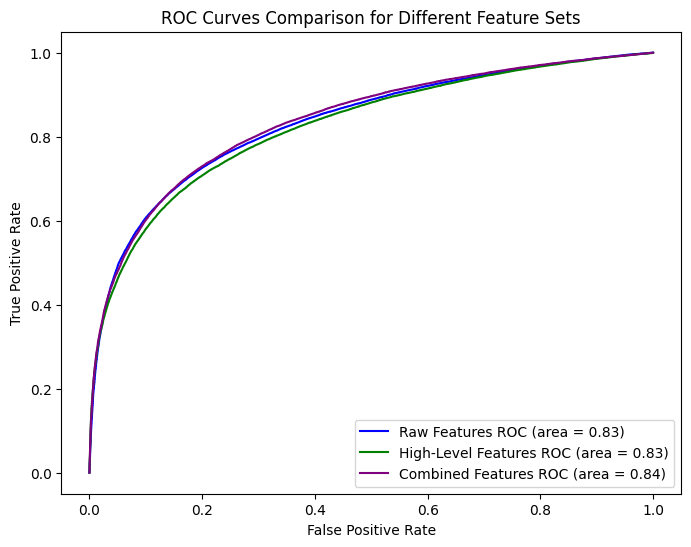

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, color='blue', label=f'Raw Features ROC (area = {roc_auc_raw:.2f})')
plt.plot(fpr_high, tpr_high, color='green', label=f'High-Level Features ROC (area = {roc_auc_high:.2f})')
plt.plot(fpr_combined, tpr_combined, color='purple', label=f'Combined Features ROC (area = {roc_auc_combined:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for Different Feature Sets')
plt.legend(loc="lower right")
plt.show()

High level features don't really improve the model, and also don't degrade information when combining features. 

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [ ]:
#PART A
## i will use random forest, knn, and support vector 

In [64]:
#part b
def compare_perf(clf, X_train, y_train, X_test, y_test, ft_name):
    clf.fit(X_train, y_train)
    
    #ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, clf.decision_function(X_test))
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{ft_name} (area = {roc_auc:.2f})")
    return roc_auc

In [65]:
#part c
def sig(clf, X_test, y_test):
    predictions = clf.predict(X_test)
    N_S = sum(predictions[y_test == 1])
    N_B = sum(predictions[y_test == 0])
    significance = N_S / np.sqrt(N_S + N_B) if N_S + N_B > 0 else 0
    return significance

In [70]:
# Initialize your models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
svc_clf = SVC(probability=True)  # Enable probabilities for SVC

# Plot ROC Curves
plt.figure()
auc_rf = compare_perf(rf_clf, X_train, y_train, X_test, y_test)
auc_knn = compare_perf(knn_clf, X_train, y_train, X_test, y_test)
auc_svc = compare_perf(svc_clf, X_train, y_train, X_test, y_test)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

NameError: name 'X_train' is not defined

<Figure size 640x480 with 0 Axes>

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

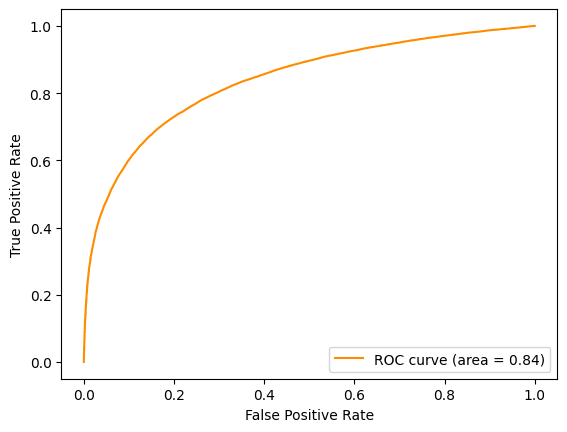

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 
